![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [4]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
# !pip install -r requirements.txt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [8]:
df.shape

(541462, 3)

In [9]:
# Impresión histograma de variable de interés (y)
df.target.hist()

<Axes: >

In [10]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [11]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [12]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 1
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [15]:
# Crear matriz de vectores
vectorizer = CountVectorizer(stop_words='english', lowercase=True, max_features=200)

# Entrenamiento de X Train y Test
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Creación y entrenamiento del modelo usando XGBRegressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',    # Activar uso de GPU
    predictor='gpu_predictor',
    n_estimators=20,
    random_state=42,
)

# Entrenamiento
xgb_model.fit(X_train_vec, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test_vec)

# Evaluación
mse_CV = mean_squared_error(y_test, y_pred_xgb)
print(f"MSE con XGBRegressor en GPU: {mse_CV:.4f}")

MSE con XGBRegressor en GPU: 0.0410


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Crear matriz de vectores usando trigramas
vectorizer_tri = CountVectorizer(stop_words='english', lowercase=True, max_features=200, ngram_range=(3, 3))

# Entrenamiento de X Train y Test
X_train_vec_tri = vectorizer_tri.fit_transform(X_train)
X_test_vec_tri = vectorizer_tri.transform(X_test)

# Creación y entrenamiento del modelo usando XGBRegressor
xgb_model_tri = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',    # Activar uso de GPU
    predictor='gpu_predictor',
    n_estimators=20,
    random_state=42,
)

# Entrenamiento
xgb_model_tri.fit(X_train_vec_tri, y_train)

# Predicciones
y_pred_xgb_tri = xgb_model_tri.predict(X_test_vec_tri)

# Evaluación
mse_tri = mean_squared_error(y_test, y_pred_xgb_tri)
print(f"MSE con XGBRegressor en GPU usando trigramas: {mse_tri:.4f}")

MSE con XGBRegressor en GPU usando trigramas: 0.0390


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

# Celda 3

TfidfVectorizer es una técnica de tokenización y vectorización del texto. Su nombre indica TF (Term Frequency, frecuencia de una palabra en un documento) y IDF (Inverse Document Frequency, qué tan rara es esa palabra en el conjunto total de documentos, o la frecuencia inversa). Esta técnica convierte un conjunto de documentos (por ejemplo, comentarios) en una matriz numérica, ponderando las palabras según su importancia relativa en cada documento.

Funciona de la siguiente manera: 
1. Tokeniza el texto (puede usar n-gramas, eliminar stopwords, etc.).
2. Cuenta las palabras en cada documento (como CountVectorizer).
3. Calcula el TF-IDF con la fórmula correspondiente, la cual garantiza que las palabras frecuentes y que aportan poca información tengan menor peso, mientras que las palabras poco frecuentas tengan un peso mayor.

En cuanto a ventajas de TfidfVectorizer, comparada con CountVectorizer, TfidfVectorizer tiene un enfoque más semántico, debido a la ponderación al momento de vectorizar las palabras, asimismo evita que las palabras comunes dominen el modelo. Esto sugiere que TfidfVectorizer puede ser usado para modelos más complejos que CountVectorizer.

Por otro lado, dentro de las desventajas de usar TfidfVectorizer se encuentra su costo computacional mayor, comparado con el de CountVectorizer y que puede perder efectividad al contar con documentos muy cortos para el análisis, ya que en ese caso la IDF no contará con suficiente información para calcular bien.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [21]:
# Crear matriz de vectores usando TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english', lowercase=True, max_features=200)

# Entrenamiento de X Train y Test
X_train_vec_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_vec_tfidf = vectorizer_tfidf.transform(X_test)

# Creación y entrenamiento del modelo usando XGBRegressor
xgb_model_tfidf = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',    # Activar uso de GPU
    predictor='gpu_predictor',
    n_estimators=20,
    random_state=42,
)

# Entrenamiento
xgb_model_tfidf.fit(X_train_vec_tfidf, y_train)

# Predicciones
y_pred_xgb_tfidf = xgb_model_tfidf.predict(X_test_vec_tfidf)

# Evaluación
mse_tfidf = mean_squared_error(y_test, y_pred_xgb_tfidf)
print(f"MSE con XGBRegressor en GPU usando TfidfVectorizer: {mse_tfidf:.4f}")

MSE con XGBRegressor en GPU usando TfidfVectorizer: 0.0391


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

Comparación de MSE entre métodos de preprocesamiento:


,Método,MSE
0,CountVectorizer (unigramas),0.041046
1,CountVectorizer (trigramas),0.039001
2,TfidfVectorizer (unigramas),0.039127


<Figure size 640x480 with 0 Axes>

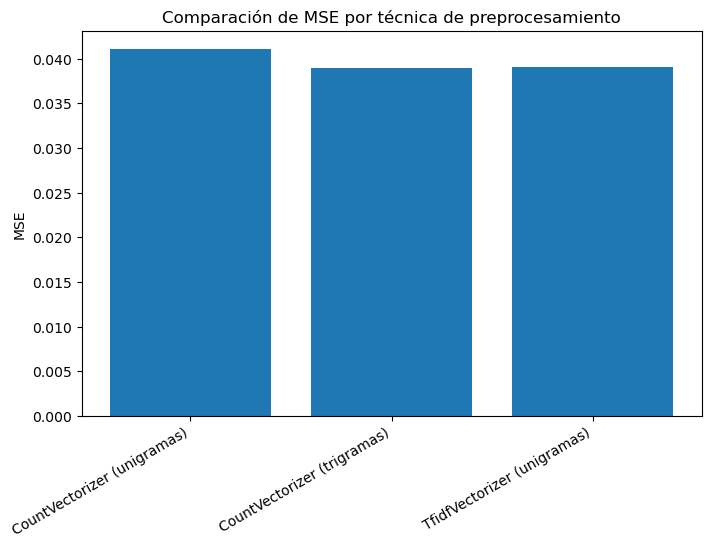

In [23]:
# Celda 5 Código para graficos y tablas comparativas

mse_results = pd.DataFrame({
    'Método': ['CountVectorizer (unigramas)', 'CountVectorizer (trigramas)', 'TfidfVectorizer (unigramas)'],
    'MSE': [mse_CV, mse_tri, mse_tfidf]
})

# Mostrar tabla
print("Comparación de MSE entre métodos de preprocesamiento:")
display(mse_results)

# Gráfico de barras
plt.clf()
plt.figure(figsize=(8,5))
plt.bar(mse_results['Método'], mse_results['MSE'])
plt.ylabel('MSE')
plt.title('Comparación de MSE por técnica de preprocesamiento')
plt.xticks(rotation=30, ha='right')
plt.show()


### Punto 5.1 - Comparación y análisis de resultados

Tras entrenar el mismo modelo de regresión utilizando tres técnicas distintas de preprocesamiento de texto, se observaron diferencias leves en el desempeño medido con la métrica de MSE (Mean Squared Error).

El enfoque con CountVectorizer usando unigramas obtuvo el MSE más alto (0.0410), indicando un desempeño ligeramente inferior.

Al incorporar trigramas en el CountVectorizer, el modelo mejoró su desempeño (MSE: 0.0390), lo que sugiere que la información adicional capturada por secuencias de tres palabras aporta valor predictivo.

Por su parte, TfidfVectorizer (con unigramas) también mejoró frente al enfoque base, obteniendo un MSE de 0.0391, muy cercano al de trigramas.

En conclusión, el preprocesamiento con trigramas y TF-IDF permitió mejorar el desempeño del modelo en comparación con la tokenización básica por palabras individuales. Esto demuestra cómo la calidad y profundidad de la representación textual puede influir directamente en los resultados de un modelo de machine learning. Sin embargo, las diferencias fueron relativamente pequeñas, por lo que el mejor método podría depender del contexto y recursos computacionales disponibles.